<a href="https://colab.research.google.com/github/hemanshu16/ML_Labs/blob/main/ML_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing some required libraries
import pandas as pd
from nltk.corpus import stopwords
import string

import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 # reading the dataset
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/SEM-6/ML/lab-6/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# replacing the '4' with '1' as positive sentiment
df["sentiment"] = df["sentiment"].replace(4,1)

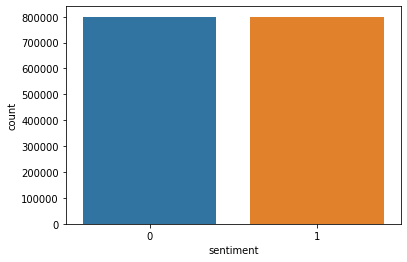

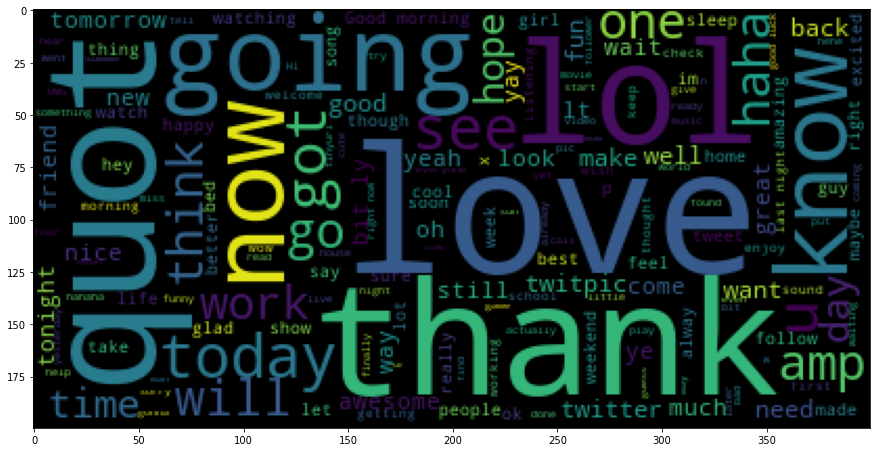

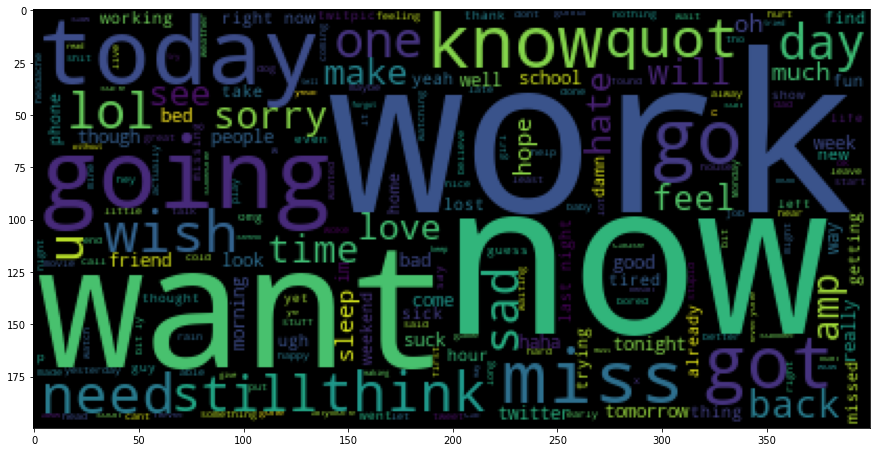

In [ ]:
# plotting the data using countplot
sns.countplot(x="sentiment",data=df)
 #creating a string of positive tweets to analyze the words
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))
 # creating the string of negative tweets to analyze the words
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

In [ ]:


# Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)

data_pos = df[df['sentiment'] == 1]
data_neg = df[df['sentiment'] == 0]

#taking one fourth data so we can run on our machine easily

data_pos = data_pos.iloc[:int(20)]
data_neg = data_neg.iloc[:int(20)]
print(data_neg['text'])
# print(data_pos)

0     @switchfoot http://twitpic.com/2y1zl - Awww, t...
1     is upset that he can't update his Facebook by ...
2     @Kenichan I dived many times for the ball. Man...
3       my whole body feels itchy and like its on fire 
4     @nationwideclass no, it's not behaving at all....
5                         @Kwesidei not the whole crew 
6                                           Need a hug 
7     @LOLTrish hey  long time no see! Yes.. Rains a...
8                  @Tatiana_K nope they didn't have it 
9                             @twittera que me muera ? 
10          spring break in plain city... it's snowing 
11                           I just re-pierced my ears 
12    @caregiving I couldn't bear to watch it.  And ...
13    @octolinz16 It it counts, idk why I did either...
14    @smarrison i would've been the first, but i di...
15    @iamjazzyfizzle I wish I got to watch it with ...
16    Hollis' death scene will hurt me severely to w...
17                                 about to file

In [ ]:
#Remove Hyperlinks
data_neg['text'] = data_neg['text'].apply(lambda text: re.sub(r'http\S+', '',text))
data_pos['text'] = data_pos['text'].apply(lambda text: re.sub(r'http\S+', '',text))


In [ ]:
#Remove StopWords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data_neg['text'] = data_neg['text'].apply(lambda text: cleaning_stopwords(text))
data_pos['text'] = data_pos['text'].apply(lambda text: cleaning_stopwords(text))
print(data_neg['text'])


0     @switchfoot - Awww, that's bummer. You shoulda...
1     upset can't update Facebook texting it... migh...
2     @Kenichan I dived many times ball. Managed sav...
3                      whole body feels itchy like fire
4     @nationwideclass no, it's not behaving all. i'...
5                              @Kwesidei not whole crew
6                                              Need hug
7     @LOLTrish hey long time no see! Yes.. Rains bi...
8                                @Tatiana_K nope didn't
9                                 @twittera que muera ?
10              spring break plain city... it's snowing
11                                    I re-pierced ears
12    @caregiving I couldn't bear watch it. And I th...
13    @octolinz16 It counts, idk I either. never tal...
14    @smarrison would've first, but didn't gun. not...
15    @iamjazzyfizzle I wish I got watch you!! I mis...
16    Hollis' death scene hurt severely watch film w...
17                                           fil

In [ ]:
# extract the features using count vectorize
from sklearn.feature_extraction.text import CountVectorizer

vectorizer1 = CountVectorizer()
vectorizer1.fit(data_neg['text'])
vectorizer1.fit(data_pos['text'])
vector1 = vectorizer1.transform(data_neg['text'])
vector2 = vectorizer1.transform(data_pos['text'])
print("Encoded Document is:")
print(vector2.toarray()[0])

Encoded Document is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
